# Flowers Dataset: Exploratory Data Analysis

In [30]:
import cv2
import os
import pandas as pd

from typing import Dict, List

In [2]:
base_path = '../../datasets/flowers/102flowers/images'
os.listdir(base_path)

['val', 'test', 'train']

## Explore data splits

In [7]:
def get_images_per_label(path: str) -> Dict:
    index = {}
    for label_folder in os.listdir(path):
        index[label_folder] = len(os.listdir(os.path.join(path, label_folder)))
        
    return index

In [8]:
train = get_images_per_label(os.path.join(base_path, 'train'))
val = get_images_per_label(os.path.join(base_path, 'val'))
test = get_images_per_label(os.path.join(base_path, 'test'))

In [17]:
samples_per_label = pd.DataFrame({
    'train': [i for i in train.values()],
    'val': [i for i in val.values()],
    'test': [i for i in test.values()]
})

In [20]:
samples_per_label.describe()

,train,val,test
count,102.0,102.0,102.000000
mean,10.0,10.0,60.284314
std,0.0,0.0,44.276891
min,10.0,10.0,20.000000
25%,10.0,10.0,29.000000
50%,10.0,10.0,46.000000
75%,10.0,10.0,72.750000
max,10.0,10.0,238.000000


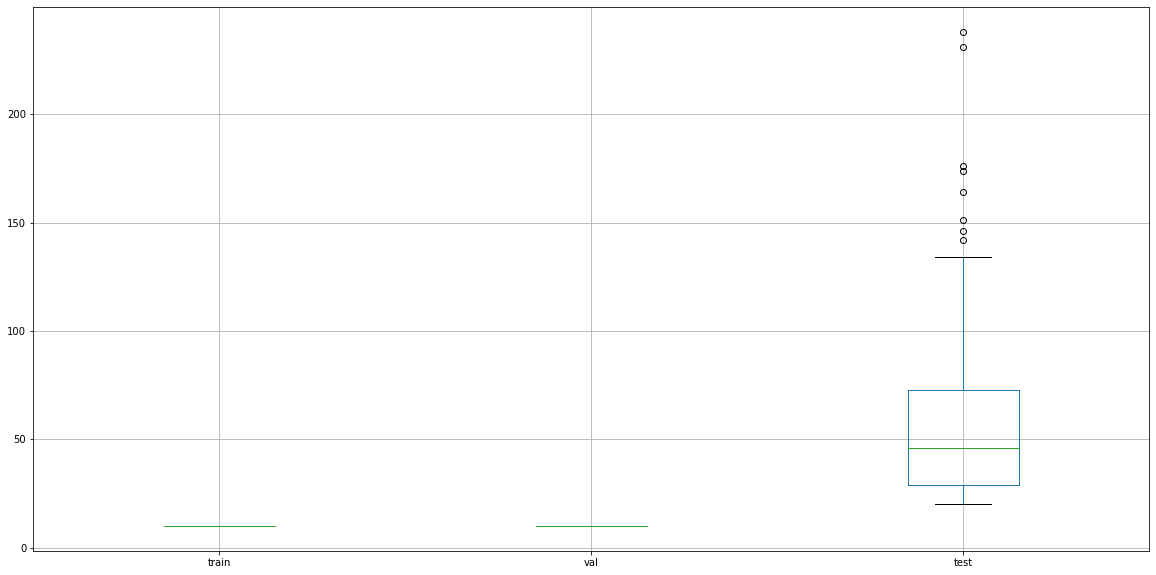

In [28]:
samples_per_label.boxplot(column=['train', 'val', 'test'], figsize=(20,10))

## Explore image sizes

In [31]:
def get_image_sizes(path: str) -> List:
    heights = []
    widths = []
    depths = []
    
    for label_folder in os.listdir(path):
        folder_path = os.path.join(path, label_folder)
        for image_name in os.listdir(folder_path):
            image_path = os.path.join(folder_path, image_name)
            image = cv2.imread(image_path)
            
            heights.append(image.shape[0])
            widths.append(image.shape[1])
            depths.append(image.shape[2])
        
    return heights, widths, depths

In [34]:
train_heights, train_widths, train_depths = get_image_sizes(os.path.join(base_path, 'train'))
val_heights, val_widths, val_depths = get_image_sizes(os.path.join(base_path, 'val'))
test_heights, test_widths, test_depths = get_image_sizes(os.path.join(base_path, 'test'))

In [39]:
len(test_heights)

6149

In [41]:
train_dimensions_per_image = pd.DataFrame({
    'train_heights': train_heights,
    'train_widths': train_widths,
    'train_depths': train_depths,
})

val_dimensions_per_image = pd.DataFrame({
    'val_heights': val_heights,
    'val_widths': val_widths,
    'val_depths': val_depths,
})

test_dimensions_per_image = pd.DataFrame({
    'test_heights': test_heights,
    'test_widths': test_widths,
    'test_depths': test_depths,
})

In [42]:
train_dimensions_per_image.describe()

,train_heights,train_widths,train_depths
count,1020.000000,1020.000000,1020.0
mean,537.775490,624.489216,3.0
std,79.235897,97.422428,0.0
min,500.000000,500.000000,3.0
25%,500.000000,500.000000,3.0
50%,500.000000,666.000000,3.0
75%,513.250000,685.250000,3.0
max,993.000000,919.000000,3.0


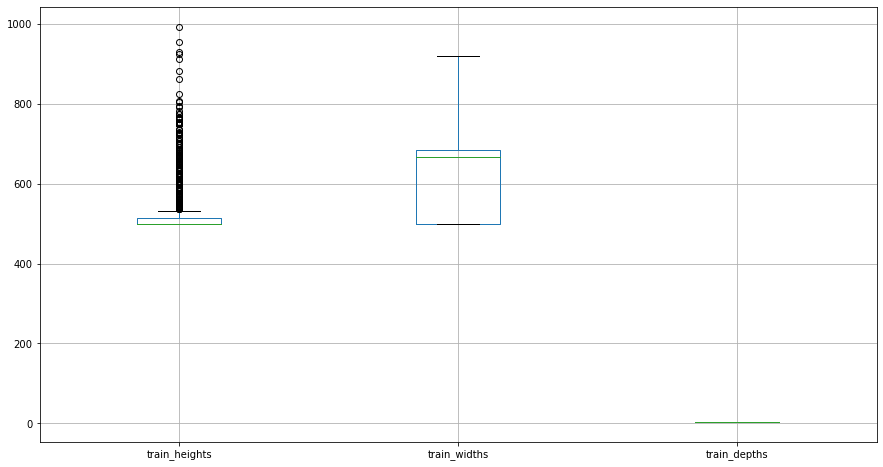

In [46]:
train_dimensions_per_image.boxplot(column=['train_heights', 'train_widths', 'train_depths'], figsize=(15,8))

In [43]:
val_dimensions_per_image.describe()

,val_heights,val_widths,val_depths
count,1020.000000,1020.000000,1020.0
mean,533.411765,622.451961,3.0
std,74.612937,94.033875,0.0
min,500.000000,500.000000,3.0
25%,500.000000,502.000000,3.0
50%,500.000000,663.500000,3.0
75%,501.000000,674.000000,3.0
max,1066.000000,885.000000,3.0


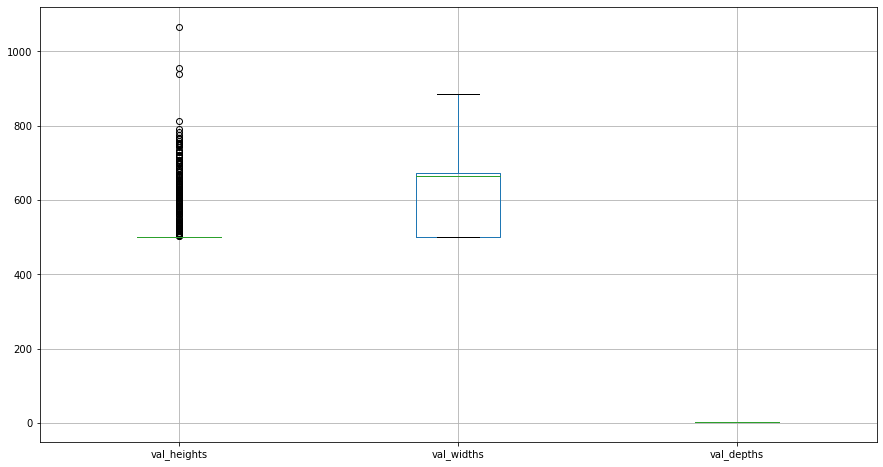

In [47]:
val_dimensions_per_image.boxplot(column=['val_heights', 'val_widths', 'val_depths'], figsize=(15,8))

In [44]:
test_dimensions_per_image.describe()

,test_heights,test_widths,test_depths
count,6149.000000,6149.000000,6149.0
mean,533.940153,632.380062,3.0
std,74.945048,95.980201,0.0
min,500.000000,500.000000,3.0
25%,500.000000,506.000000,3.0
50%,500.000000,667.000000,3.0
75%,501.000000,702.000000,3.0
max,1168.000000,1024.000000,3.0


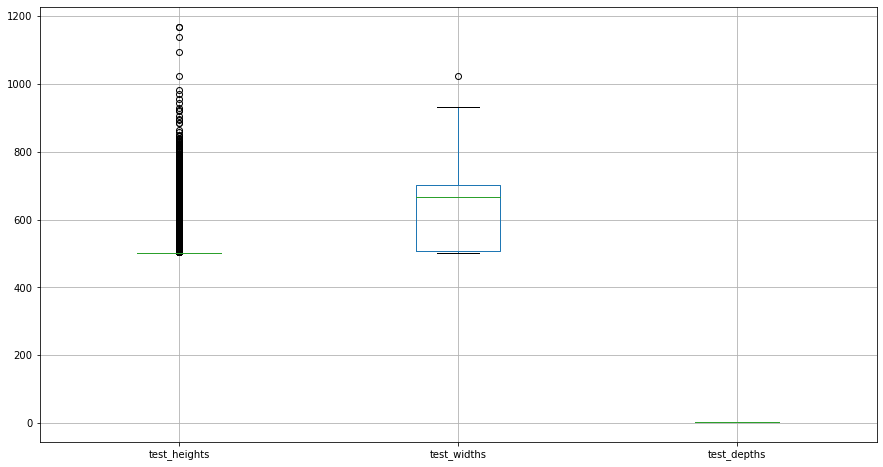

In [48]:
test_dimensions_per_image.boxplot(column=['test_heights', 'test_widths', 'test_depths'], figsize=(15,8))

### Comparing data splits

#### Heights

In [51]:
print('Max: {}\t Min: {}\t Mean: {}'.format(train_dimensions_per_image['train_heights'].max(), 
                                            train_dimensions_per_image['train_heights'].min(), 
                                            train_dimensions_per_image['train_heights'].mean()))
print('Max: {}\t Min: {}\t Mean: {}'.format(val_dimensions_per_image['val_heights'].max(), 
                                            val_dimensions_per_image['val_heights'].min(), 
                                            val_dimensions_per_image['val_heights'].mean()))
print('Max: {}\t Min: {}\t Mean: {}'.format(test_dimensions_per_image['test_heights'].max(), 
                                            test_dimensions_per_image['test_heights'].min(), 
                                            test_dimensions_per_image['test_heights'].mean()))

Max: 993	 Min: 500	 Mean: 537.7754901960784
Max: 1066	 Min: 500	 Mean: 533.4117647058823
Max: 1168	 Min: 500	 Mean: 533.9401528703854


#### Widths

In [53]:
print('Max: {}\t Min: {}\t Mean: {}'.format(train_dimensions_per_image['train_widths'].max(), 
                                            train_dimensions_per_image['train_widths'].min(), 
                                            train_dimensions_per_image['train_widths'].mean()))
print('Max: {}\t Min: {}\t Mean: {}'.format(val_dimensions_per_image['val_widths'].max(), 
                                            val_dimensions_per_image['val_widths'].min(), 
                                            val_dimensions_per_image['val_widths'].mean()))
print('Max: {}\t Min: {}\t Mean: {}'.format(test_dimensions_per_image['test_widths'].max(), 
                                            test_dimensions_per_image['test_widths'].min(), 
                                            test_dimensions_per_image['test_widths'].mean()))

Max: 919	 Min: 500	 Mean: 624.4892156862745
Max: 885	 Min: 500	 Mean: 622.4519607843138
Max: 1024	 Min: 500	 Mean: 632.3800617986665


#### Dephs

In [54]:
print('Max: {}\t Min: {}\t Mean: {}'.format(train_dimensions_per_image['train_depths'].max(), 
                                            train_dimensions_per_image['train_depths'].min(), 
                                            train_dimensions_per_image['train_depths'].mean()))
print('Max: {}\t Min: {}\t Mean: {}'.format(val_dimensions_per_image['val_depths'].max(), 
                                            val_dimensions_per_image['val_depths'].min(), 
                                            val_dimensions_per_image['val_depths'].mean()))
print('Max: {}\t Min: {}\t Mean: {}'.format(test_dimensions_per_image['test_depths'].max(), 
                                            test_dimensions_per_image['test_depths'].min(), 
                                            test_dimensions_per_image['test_depths'].mean()))

Max: 3	 Min: 3	 Mean: 3.0
Max: 3	 Min: 3	 Mean: 3.0
Max: 3	 Min: 3	 Mean: 3.0
